In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf


In [94]:
data = pd.read_csv('Dataset/data.csv')
# data = data.head(10000)
data['Date'] = pd.to_datetime(data['Date'])

data['OnlyDate'] = data['Date'].dt.date
data['OnlyTime'] = data['Date'].dt.time

# Finding the Date Range

In [95]:
print("Min Date:", data['OnlyDate'].min())
print("Max Date:", data['OnlyDate'].max())
print("Range:", data['OnlyDate'].max() - data['OnlyDate'].min())

Min Date: 2024-01-01
Max Date: 2025-09-15
Range: 623 days, 0:00:00


# Finding Returns

In [103]:
data['logReturn'] = np.log(data['Close']/data['Close'].shift(1))
data['logReturn'] = data['logReturn'].fillna(0)
data['Return'] = data['Close'] - data['Close'].shift(1)
data['Return'] = data['Return'].fillna(0)

In [104]:
print("Missing value count by column:")
print(data.isnull().sum())
print("\nDuplicate rows count:", data.duplicated().sum())

Missing value count by column:
Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
OnlyDate     0
OnlyTime     0
logReturn    0
Return       0
dtype: int64

Duplicate rows count: 0


# Plots

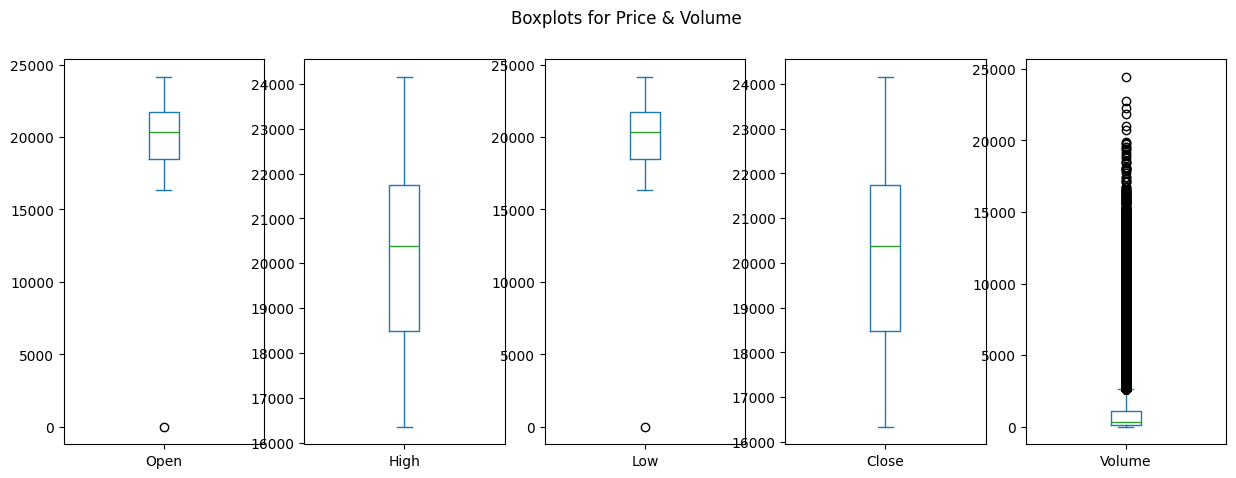

In [98]:
# Outlier boxplots for numeric columns
data[['Open','High','Low','Close','Volume']].plot(kind='box', subplots=True, layout=(1,5), figsize=(15,5))
plt.suptitle("Boxplots for Price & Volume")
plt.show()


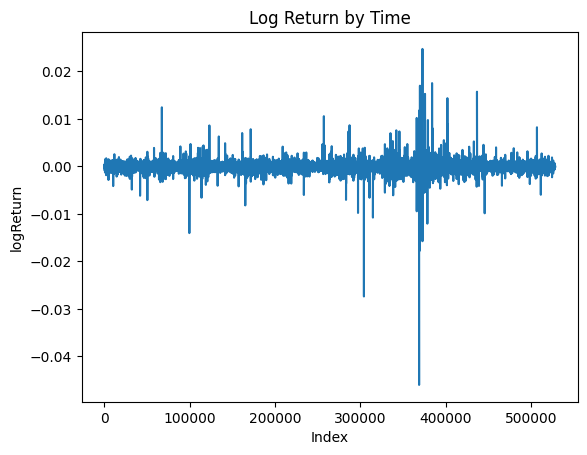

In [99]:
sns.lineplot(y=data['logReturn'], x = data['Index'])
plt.title('Log Return by Time')

plt.savefig('Plots/seaborn_logreturn_plot.png', dpi=600, bbox_inches='tight')
plt.show()


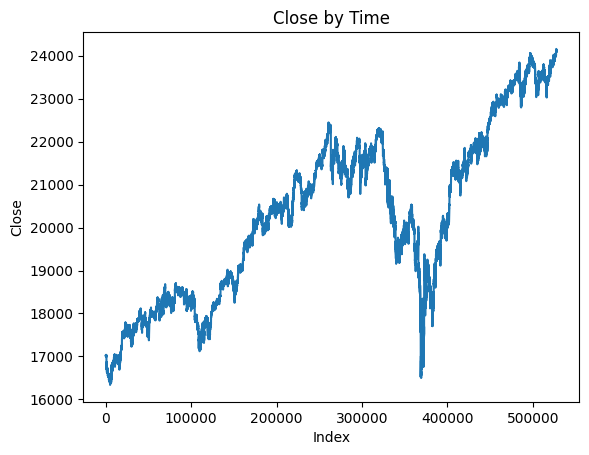

In [100]:
sns.lineplot(y=data['Close'], x = data['Index'])
plt.title('Close by Time')

plt.savefig('Plots/close_plot.png', dpi=600, bbox_inches='tight')
plt.show()


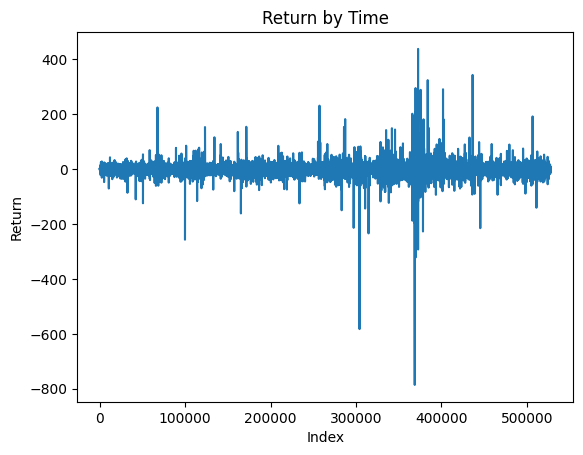

In [101]:
sns.lineplot(y=data['Return'], x = data['Index'])
plt.title('Return by Time')

plt.savefig('Plots/return_plot.png', dpi=600, bbox_inches='tight')
plt.show()

# Dickey-Fuller and ACF & PACF Plots

ADF Statistic: -71.34788430280187
p-value: 0.0
Crit. Value 1%: -3.430362387209557
Crit. Value 5%: -2.8615454750014595
Crit. Value 10%: -2.5667729141431703


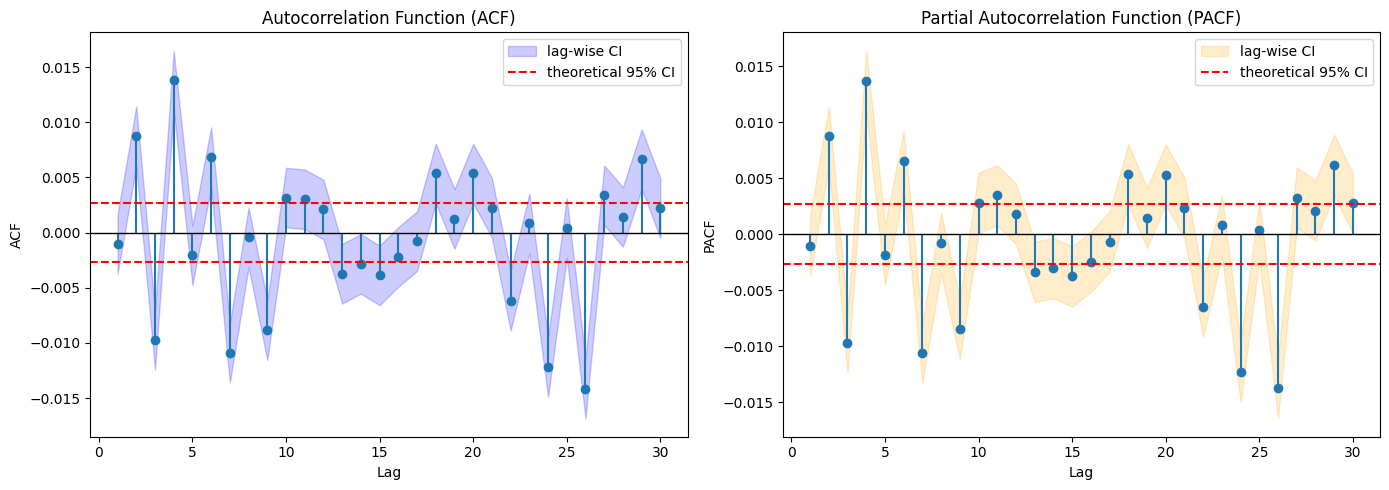

In [ ]:
# Dickey-Fuller Test 
adf_result = adfuller(data['logReturn'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
    print(f'Crit. Value {key}: {value}')

series = data['logReturn']
acf_vals, acf_confint = acf(series, nlags=30, alpha=0.05)
pacf_vals, pacf_confint = pacf(series, nlags=30, method='ywm', alpha=0.05)

# Exclude lag 0
lags = np.arange(1, 31)
acf_vals = acf_vals[1:]
acf_confint = acf_confint[1:]
pacf_vals = pacf_vals[1:]
pacf_confint = pacf_confint[1:]

# Theoretical 95% CI (white noise)
N = len(series)
conf = 1.96 / np.sqrt(N)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot
axes[0].stem(lags, acf_vals, basefmt=" ")
axes[0].fill_between(lags, acf_confint[:, 0], acf_confint[:, 1], color='blue', alpha=0.2, label='lag-wise CI')
axes[0].axhline(0, color='black', linewidth=1)
axes[0].axhline(conf, color='red', linestyle='--', label='theoretical 95% CI')
axes[0].axhline(-conf, color='red', linestyle='--')
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')
axes[0].legend()

# PACF plot
axes[1].stem(lags, pacf_vals, basefmt=" ")
axes[1].fill_between(lags, pacf_confint[:, 0], pacf_confint[:, 1], color='orange', alpha=0.2, label='lag-wise CI')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].axhline(conf, color='red', linestyle='--', label='theoretical 95% CI')
axes[1].axhline(-conf, color='red', linestyle='--')
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')
axes[1].legend()

plt.tight_layout()
plt.show()

### This means the log returns series is strongly stationary.